## Problem Statement - Predict If a Customer Will Make a Purchase on a Website

#### introduction - E-commerce becoming more and more prevalent in today’s economy  and due to Covid-19 pandamic, we have seen huge shift into online buying behavior, so it is important for businesses  to understand what factors into a site visitor making a purchase, and being able to put their attention on potential customers.  if it’s possible to predict the buying behavior of a site visitor as this can have many implications such as E-commerce website able to better target ads or figure out factors that may lead to increased sales.

## About The Data :

- Data Source : UCI Machine Learning Depository https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

#### Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration :
- represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

#### Bounce Rate :
- feature for a web page refers to the percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session. This is the number of single-page visits by visitors of the website.

#### Exit Rate
- feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. This is the number of exits from the website.

#### Page Value
- feature represents the average value for a web page that a user visited before completing an e-commerce transaction. It tells you which specific pages of the site offer the most value. For instance, a product page for an Ecommerce site will usually have a higher page value than a resource page.

#### Special Day  
- feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

### Operating system,browser, region, traffic type 
- Different types of operating systems, browser, region and traffic type used to visit the website
### Visitor type 
- Whether the customer is a returning or new visitor
### Weekend 
- A Boolean value indicating whether the date of the visit is weekend
### Month 
- Month of the year.

### Class Label (desired target):

- Revenue - has the client purchased a product on the website? (binary: ‘TRUE’, ‘FALSE’)

## Importing Important Library

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [243]:
data = pd.read_csv("online_shoppers_intention.csv")

In [244]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [245]:
## Know the Data Type and there is null value or Not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- There is no Null values and there are eight categorical features, and Nine quantitative Features and target label is "revenue" column 

- SpecialDay , Month,OperatingSystems,Browser,Region,TrafficType,VisitorType, Weekend are categorical Features 

-The data is clean!

### EDA On the Dataset
- General analysis of the dataset
- In order to understand more about the data, let's observe the dataset with some analysis tools

### Descriptive Statistics:

In [246]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [247]:
## Administrative_Duration,Informational_Duration, roductRelated_Duration, BounceRates, ExitRates are highly Skewed

### Countplots which count the number of customers in various features

Text(0.5, 1.0, 'Weekend')

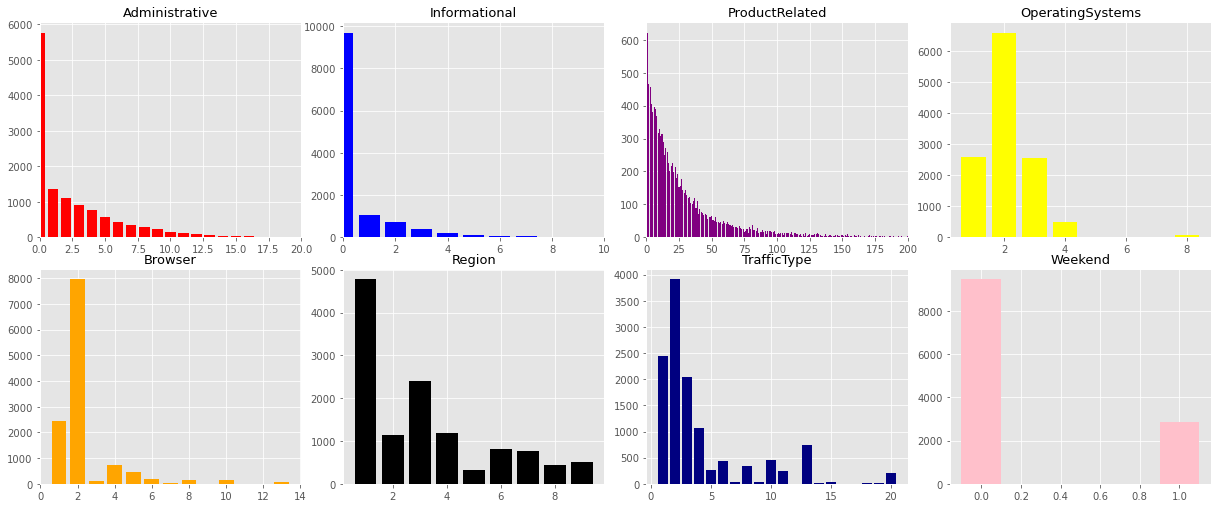

In [248]:
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,7))
fig.tight_layout()
#fig.suptitle('Countplots Of Some Features')

ax[0,0].bar(data['Administrative'].value_counts().index,data['Administrative'].value_counts().values,color = 'red')
ax[0,0].set_title('Administrative',size=13)
ax[0,0].set_xlim(0,20)

ax[0,1].bar(data['Informational'].value_counts().index,data['Informational'].value_counts().values,color = 'blue')
ax[0,1].set_title('Informational',size=13)
ax[0,1].set_xlim(0,10)

ax[0,2].bar(data['ProductRelated'].value_counts().index,data['ProductRelated'].value_counts().values,color = 'purple')
ax[0,2].set_title('ProductRelated',size=13)
ax[0,2].set_xlim(0,200)

ax[0,3].bar(data['OperatingSystems'].value_counts().index,data['OperatingSystems'].value_counts().values,color = 'yellow')
ax[0,3].set_title('OperatingSystems',size=13)

ax[1,0].bar(data['Browser'].value_counts().index,data['Browser'].value_counts().values,color = 'orange')
ax[1,0].set_title('Browser',size=13)

ax[1,1].bar(data['Region'].value_counts().index,data['Region'].value_counts().values,color = 'black')
ax[1,1].set_title('Region',size=13)


ax[1,2].bar(data['TrafficType'].value_counts().index,data['TrafficType'].value_counts().values,color = 'navy')
ax[1,2].set_title('TrafficType',size=13)

ax[1,3].bar(data['Weekend'].value_counts().index,data['Weekend'].value_counts().values,color = 'pink',width=0.2)
ax[1,3].set_title('Weekend',size=13)


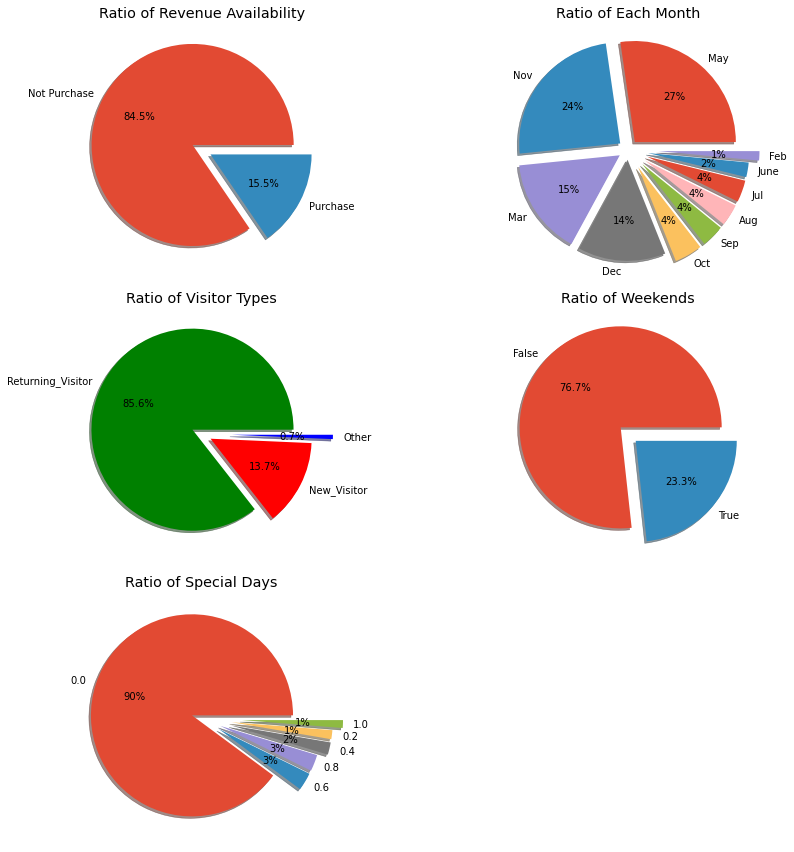

In [249]:
# Lets see Some  other categorical features with pie chart
plt.style.use('ggplot')
fig,ax = plt.subplots(3,2,figsize=(10,6))
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
# Revenue
ax[0,0].pie(data['Revenue'].value_counts().values,labels = ['Not Purchase','Purchase'],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[0,0].set_title('Ratio of Revenue Availability')

# Month 
ax[0,1].pie(data['Month'].value_counts().values,labels= data['Month'].value_counts().index[:],shadow = True, explode = [0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.3],autopct='%1.0f%%')
ax[0,1].set_title('Ratio of Each Month')

# Visitor Types
ax[1,0].pie(data['VisitorType'].value_counts().values,labels= data['VisitorType'].value_counts().index[:],explode = [0.1,0.1,0.3],shadow = True,autopct='%1.1f%%',colors=['green','red','blue'])
ax[1,0].set_title('Ratio of Visitor Types')

# Weekend
ax[1,1].pie(data['Weekend'].value_counts().values,labels= data['Weekend'].value_counts().index[:],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[1,1].set_title('Ratio of Weekends')

# Special Days
ax[2,0].pie(data['SpecialDay'].value_counts().values,labels= data['SpecialDay'].value_counts().index[:],explode = [0.1,0.2,0.2,0.3,0.3,0.4],shadow = True,autopct='%1.0f%%')
ax[2,0].set_title('Ratio of Special Days')

fig.delaxes(ax[2,1])

### Analysis The Traffic volume whether purchase is happened or not over the months

In [250]:
month_dict = { 'Feb':2, 'Mar':3, 'May': 5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,
       'Dec':12
             }
data['Month'] = data['Month'].map(month_dict)

In [251]:
purchase_count =data[data['Revenue']==1]['Revenue'].groupby(data['Month']).count()
Not_purchase_count =data[data['Revenue']==0]['Revenue'].groupby(data['Month']).count()
Total_traffic = data['Revenue'].groupby(data['Month']).count()

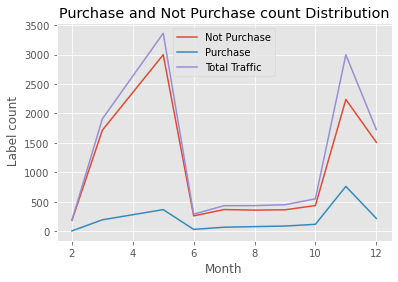

In [252]:
plt.plot(Not_purchase_count.index,Not_purchase_count.values,label='Not Purchase')
plt.plot(purchase_count.index,purchase_count.values,label='Purchase')
plt.plot(Total_traffic.index,Total_traffic.values,label='Total Traffic')
plt.xlabel("Month")
plt.ylabel(" Label count")
plt.title("Purchase and Not Purchase count Distribution")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

#### we observed that, most site traffic happened in May with a slump in traffic over summer, whereas the most purchases that occurred happened in November which seems almost twice as much as the purchases that occurred in May.

### Here are some Non-Stacked bar charts to depict the ratio between False Revenue and True Revenue of some categorical columns

Text(0.5, 1.0, 'Ratio of Revenue Of Each Special Days')

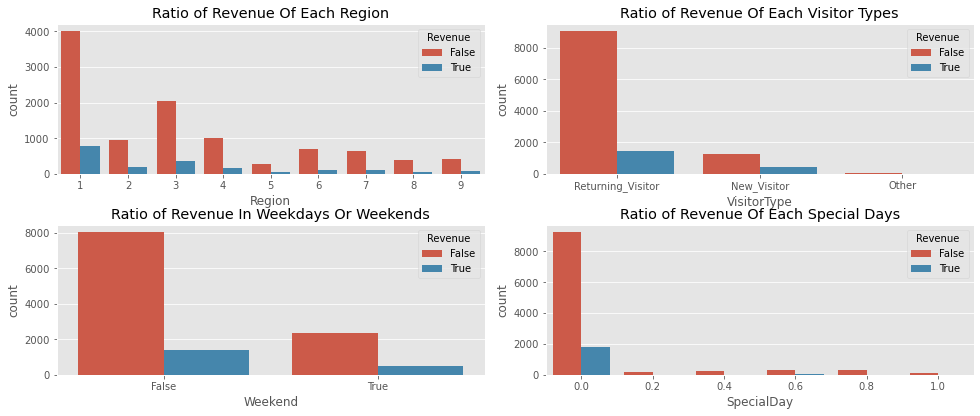

In [253]:
# Lets see the Ratio of Revenue in each categorical features
fig, ax = plt.subplots(2,2,figsize = (14,6))
plt.tight_layout(pad= 3)


Region_rev = data[['Region','Revenue']]  
vis_rev = data[['VisitorType','Revenue']]
weekends_rev = data[['Weekend','Revenue']]
spd_rev = data[['SpecialDay','Revenue']]


sns.countplot(x = Region_rev['Region'],hue = Region_rev['Revenue'],ax =ax[0,0]).set_title('Ratio of Revenue Of Each Region')
sns.countplot(x = vis_rev['VisitorType'],hue = vis_rev['Revenue'],ax =ax[0,1]).set_title('Ratio of Revenue Of Each Visitor Types')
sns.countplot(x = weekends_rev['Weekend'],hue = weekends_rev['Revenue'],ax =ax[1,0]).set_title('Ratio of Revenue In Weekdays Or Weekends')
sns.countplot(x = spd_rev['SpecialDay'],hue = spd_rev['Revenue'],ax =ax[1,1]).set_title('Ratio of Revenue Of Each Special Days')

### How  ProductRelated Durations,Administrative_Duration,Informational_Duration,ExitRates,BounceRates affect  to make revenue?

In [254]:
prddur_rev = data.groupby('Revenue')['ProductRelated_Duration','Administrative_Duration','Informational_Duration','ExitRates','BounceRates'].mean()
prddur_rev = pd.DataFrame(prddur_rev)
prddur_rev

,ProductRelated_Duration,Administrative_Duration,Informational_Duration,ExitRates,BounceRates
Revenue,,,,,
False,1069.987809,73.740111,30.236237,0.047378,0.025317
True,1876.209615,119.483244,57.611427,0.019555,0.005117


- As the result, the average duration of ProductRelated, Administrative and Informational_Duration with true Revenue is higher than with the false Revenue whereas Exit rates is about 3 times and Bounce Rates is about 5 time lower True Revenue than false revenue
 

### Let's see which feature is most likely to be correlated with the 'Revenue' Feature?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Administrative'),
  Text(1, 0, 'Administrative_Duration'),
  Text(2, 0, 'Informational'),
  Text(3, 0, 'Informational_Duration'),
  Text(4, 0, 'ProductRelated'),
  Text(5, 0, 'ProductRelated_Duration'),
  Text(6, 0, 'BounceRates'),
  Text(7, 0, 'ExitRates'),
  Text(8, 0, 'PageValues'),
  Text(9, 0, 'SpecialDay'),
  Text(10, 0, 'Month'),
  Text(11, 0, 'OperatingSystems'),
  Text(12, 0, 'Browser'),
  Text(13, 0, 'Region'),
  Text(14, 0, 'TrafficType'),
  Text(15, 0, 'Weekend')])

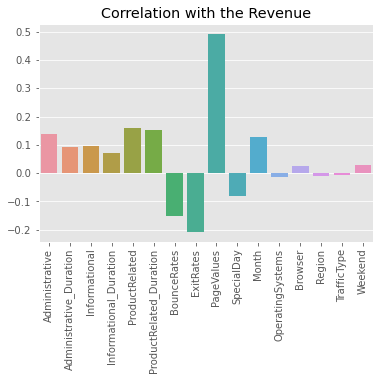

In [255]:
# Correlation with Revenue
data_corr = data.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)

## Data Transformation


-  There are some categorical columns, which type is given in string form we have to transform it into numeric value bu using Encoding Tachnique

## One hot Encoding of Target  Revenue and Weekend Variable 

In [256]:
Bool_category = {False:0, True:1}
data.Revenue =data.Revenue.map(Bool_category)
data.Weekend =data.Weekend.map(Bool_category)

## Probability Ratio Encoding of "Visitor Type" Columns 

In [257]:
Rev_prob = data.Revenue.groupby(data['VisitorType']).mean().round(2)
Rev_prob = pd.DataFrame(Rev_prob)

In [258]:
Rev_prob['Not Rev'] = 1-Rev_prob['Revenue']
Rev_prob['Prob ratio'] = Rev_prob['Revenue']/Rev_prob['Not Rev']

In [259]:
data['VisitorType']= data['VisitorType'].map(Rev_prob['Prob ratio'].round(2))

## Frequency Encoding of "Month" Encoding

In [260]:
month_freq = data['Month'].value_counts()

In [261]:
data['Month'] = data['Month'].map(month_freq)

In [262]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,184,1,1,1,1,0.16,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,184,2,2,1,2,0.16,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,184,4,1,9,3,0.16,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,184,3,2,2,4,0.16,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,184,3,3,1,4,0.16,1,0


###  Remove  Outlier

In [263]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [264]:
columns_remove_outlier = ['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration',]

low_lim = []
upp_lim = []
column   = []

for i in  columns_remove_outlier :
    Q1 = np.percentile(data[i].values, 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data[i].values, 50, interpolation = 'midpoint') 
    Q3 = np.percentile(data[i].values, 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1
    if (Q1 - 1.5 * IQR)<=0 :
        low_lim.append(0)
    else :
        low_lim.append(Q1 - 1.5 * IQR)
        
    upp_lim.append(Q3 + 1.5 * IQR)
    column.append(i)

    
print(low_lim,'\n',upp_lim,'\n',column)


[0, 0, 0] 
 [233.03125000000003, 0.0, 3383.9995225] 
 ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']


In [265]:
df_lim = pd.DataFrame([low_lim,upp_lim],columns =column, index=['low_lim','upp_lim'])

In [266]:
df_lim

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
low_lim,0.00000,0.0,0.000000
upp_lim,233.03125,0.0,3383.999522


In [267]:
## we are not cosidering 'Informational_Duration' columns and since all values are equal to or grater than
#    zero so i write only upper limit condition.

x=data[(data['Administrative_Duration'] < df_lim['Administrative_Duration']['upp_lim']) &
       (data['ProductRelated_Duration'] < df_lim['ProductRelated_Duration']['upp_lim'])
      ].drop('Revenue',axis=1)

y =data[ (data['Administrative_Duration'] < df_lim['Administrative_Duration']['upp_lim']) &
         (data['ProductRelated_Duration'] < df_lim['ProductRelated_Duration']['upp_lim'])
         ]['Revenue']

## Classification

### Goal :
- To classify the customer whether he/she is interested on purchasing the products online.
  Classification Models :
  
- I will be using 4 classification models : RandomForestClassifier,Logistic Regression, Support Vector Machine and KNN( k-nearest neighbors algorithm)

## Standarization of Features

In [268]:
# Scaled feature
Standardisation = StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)

In [269]:
x_std = pd.DataFrame(x_after_Standardisation, columns= data.columns.drop(['Revenue']))

### Features Selection

In [270]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_std, y)
imp_features = clf.feature_importances_  

In [271]:
mutual_info = pd.Series(imp_features)
mutual_info.index = x_std.columns
mutual_info_sorted=mutual_info.sort_values(ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

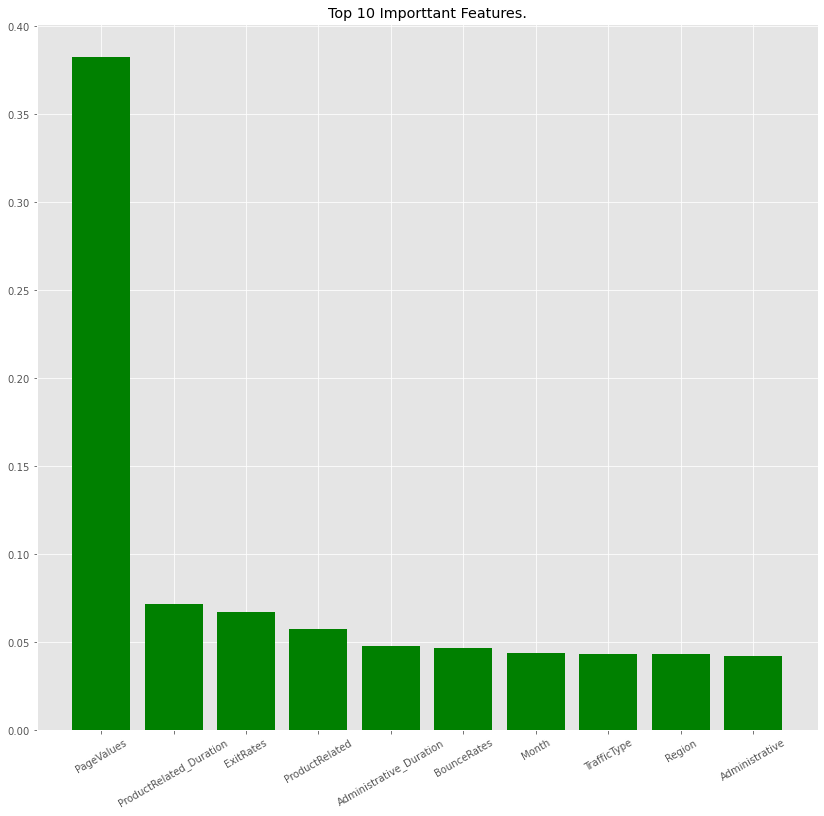

In [272]:
plt.figure(1, figsize=(14, 13))
plt.title("Top 10 Importtant Features.")
plt.bar(mutual_info_sorted[ :10].index, mutual_info_sorted[ :10].values,color="g",  align="center")
plt.xticks(rotation=30)

In [273]:
top_10_imp_features = mutual_info_sorted[ :10].index.to_list()

In [274]:
imp_features = x_std[top_10_imp_features]

In [275]:
# spliting the Data into Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(imp_features, y, test_size=0.3, stratify=y)

In [276]:
## Print Shape of Train and Test Dataset
print(X_train.shape,X_test.shape)

(7326, 10) (3140, 10)


In [277]:
## Revenue category proportion in train Dataset
print(y_train.value_counts(),'\n',y_train.value_counts(normalize=True))

0    6332
1     994
Name: Revenue, dtype: int64 
 0    0.864319
1    0.135681
Name: Revenue, dtype: float64


## RandomForestClassifier

In [278]:
rfclf = RandomForestClassifier()

rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print('Classification Report on Test Data :',classification_report(y_test,pred))
print('Accuracy Score on Test Data : ',accuracy_score(y_test,pred))

Classification Report on Test Data :               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2714
           1       0.76      0.61      0.68       426

    accuracy                           0.92      3140
   macro avg       0.85      0.79      0.82      3140
weighted avg       0.92      0.92      0.92      3140

Accuracy Score on Test Data :  0.921656050955414


#### Cross Validation 

In [279]:
print('Minimum accuray rate',cross_val_score(rfclf,X_train,y_train, cv=5, scoring = 'accuracy').min())

Minimum accuray rate 0.9139931740614334


### Hyperparameter Tunning 

In [280]:
sm_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
hyperParam={'n_estimators':sp_randint(1,1000),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']
           }

rsearch_rfc = RandomizedSearchCV(sm_rfc_tunned,hyperParam,cv=3,scoring='roc_auc',n_jobs=-1,verbose=1)

rsearch_rfc.fit(X_train,y_train)
print("Model with Best HyperParameter: ",rsearch_rfc.best_estimator_)
print('best Accuracy score after Tunning :',rsearch_rfc.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model with Best HyperParameter:  RandomForestClassifier(max_depth=39, max_features=9, min_samples_leaf=18,
                       min_samples_split=9, n_estimators=679, random_state=0)
best Accuracy score after Tunning : 0.9361445408219221


In [281]:
## choosing Model with Best parameter values after Hyperparameter Tunning
rfclf = rsearch_rfc.best_estimator_

rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2714
           1       0.76      0.63      0.69       426

    accuracy                           0.92      3140
   macro avg       0.85      0.80      0.82      3140
weighted avg       0.92      0.92      0.92      3140

0.9232484076433121


In [282]:
## Print Confussion martix
confusion_matrix(y_test,pred)

array([[2629,   85],
       [ 156,  270]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

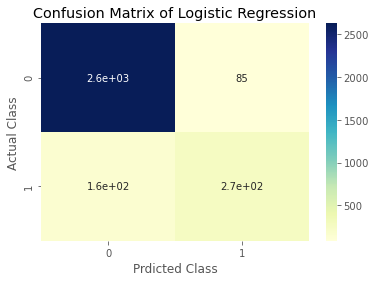

In [283]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True,cmap='YlGnBu')

plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## LogisticRegression

In [284]:
lregression = LogisticRegression()
lregression.fit(X_train,y_train)
pred_lr = lregression.predict(X_test)
print(classification_report(y_test,pred_lr))
print( 'Accuracy Score for Test Data:',accuracy_score(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2714
           1       0.79      0.45      0.57       426

    accuracy                           0.91      3140
   macro avg       0.85      0.72      0.76      3140
weighted avg       0.90      0.91      0.90      3140

Accuracy Score for Test Data: 0.9092356687898089


## Cross Validation 

In [285]:
print('Minimum accuray rate on Train Dataset',cross_val_score(lregression,X_train,y_train, cv=5, scoring = 'accuracy').min())

Minimum accuray rate on Train Dataset 0.8982935153583618


## Hyperparameter tunning

In [286]:
LR = LogisticRegression()
penalty= ['l1', 'l2']
C=[.001,.01,.1,1,10]
solver=['liblinear','lbfgs','saga']
hyperParam = [{'penalty':penalty,'C':C,'solver':solver,}]
rsearch_LR = RandomizedSearchCV(LR ,param_distributions=hyperParam,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_LR.fit(X_train,y_train)
print( 'Best Accuracy:',rsearch_LR.best_score_)
print("Model with Best Hyperparameter",rsearch_LR.best_estimator_)

Best Accuracy: 0.9030849030849031
Model with Best Hyperparameter LogisticRegression(C=1, solver='liblinear')


In [287]:
## choosing Best parameter values after Hyperparameter Tunning
LR = rsearch_LR.best_estimator_

In [288]:
LR.fit(X_train,y_train)
y_pred= LR.predict(X_test)
print('Classification Report on Test Data :\n\n',classification_report(y_test,y_pred))
print('Accuracy Score on Test Dataset',accuracy_score(y_test,y_pred)*100)

Classification Report on Test Data :

               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2714
           1       0.79      0.45      0.57       426

    accuracy                           0.91      3140
   macro avg       0.85      0.71      0.76      3140
weighted avg       0.90      0.91      0.90      3140

Accuracy Score on Test Dataset 90.85987261146497


In [289]:
## Print Confussion martix
confusion_matrix(y_test,y_pred)

array([[2662,   52],
       [ 235,  191]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

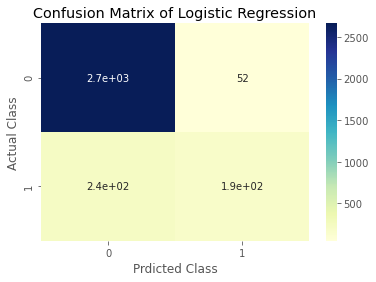

In [290]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='YlGnBu')
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## Support Vector Machine (SVM)

In [291]:
svm = SVC()
svm.fit(X_train,y_train)
pred_s= svm.predict(X_test)

print(classification_report(y_test,pred_s))
accuracy_score(y_test,pred_s)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2714
           1       0.80      0.57      0.67       426

    accuracy                           0.92      3140
   macro avg       0.87      0.77      0.81      3140
weighted avg       0.92      0.92      0.92      3140



0.9229299363057325

### Cross validation

In [292]:
print('Minimum Accuracy Rate is on Train Data :' ,cross_val_score(svm,X_train,y_train, cv=5, scoring ='accuracy').min())

Minimum Accuracy Rate is on Train Data : 0.9098976109215017


### Hyperparameter tunning

In [293]:
# defining parameter range

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']} 
rsearch_svm = RandomizedSearchCV(svm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1)

rsearch_svm.fit(X_train,y_train)
print("Model with Best HyperParameter: ",rsearch_svm.best_estimator_)
print('\n Best Accuracy Score :',rsearch_svm.best_score_)

Model with Best HyperParameter:  SVC(C=100, gamma=0.01)

 Best Accuracy Score : 0.9131859131859131


In [294]:
## Choosing Best parameters
svm = rsearch_svm.best_estimator_
svm.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [295]:
pred_svm = svm.predict(X_test)

# print classification report
print('Classification Report on Test Data\n',classification_report(y_test,pred_s))
print('\n Accuray score on Test data :\t',accuracy_score(y_test,pred_s))

Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2714
           1       0.80      0.57      0.67       426

    accuracy                           0.92      3140
   macro avg       0.87      0.77      0.81      3140
weighted avg       0.92      0.92      0.92      3140


 Accuray score on Test data :	 0.9229299363057325


In [296]:
## Print Confussion martix
confusion_matrix(y_test,pred_svm)

array([[2642,   72],
       [ 177,  249]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

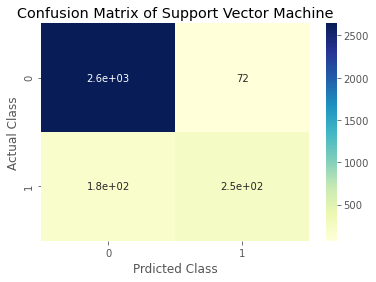

In [297]:
sns.heatmap(confusion_matrix(y_test,pred_svm),annot = True,cmap='YlGnBu')
plt.title('Confusion Matrix of Support Vector Machine')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## KNearestNeighbors (KNN)

### Hyperparameter Tunning 

In [298]:
knn = KNeighborsClassifier()

# defining parameter range
params={'n_neighbors':sp_randint(1,100)}

rsearch_knn =RandomizedSearchCV(knn,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn.fit(X_train,y_train)
print("Model with Best HyperParameter: ",rsearch_knn.best_estimator_)
print('Best Acccuracy Score after tunning : ',rsearch_knn.best_score_)

Model with Best HyperParameter:  KNeighborsClassifier(n_neighbors=88)
Best Acccuracy Score after tunning :  0.8790791184639429


In [299]:
## Choosing model with Best parameter 
knn = rsearch_knn.best_estimator_
knn.fit(X_train,y_train)
pred_k = knn.predict(X_test)
print('Classification Report :\n',classification_report(y_test,pred_k))
print('Accuracy Score on test data :',accuracy_score(y_test,pred_k))

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      2714
           1       0.86      0.38      0.53       426

    accuracy                           0.91      3140
   macro avg       0.88      0.69      0.74      3140
weighted avg       0.90      0.91      0.89      3140

Accuracy Score on test data : 0.9073248407643312


In [300]:
## Print Confussion martix
confusion_matrix(y_test,pred_k)

array([[2687,   27],
       [ 264,  162]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

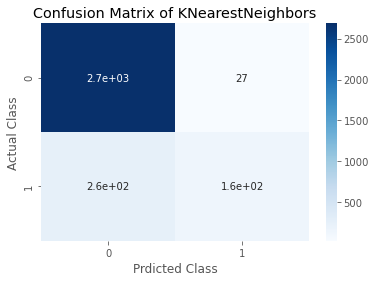

In [301]:
sns.heatmap(confusion_matrix(y_test,pred_k),annot = True,cmap='Blues')
plt.title('Confusion Matrix of KNearestNeighbors')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

### We are getting almost same level of Accuracy  from all above model after Hyoerparameter Tunning, but Recall values for Revenue when it is True is better in randomforest Model than other model which we tested, we need higher Recall value for Revenue when it is True, so that we can target the potential customer more efficiently. but it is still low recall value.

- Reson for low Recall value for revenue when it is  True is Imabalance Dataset
- So We have to handle this imbalance Data
- I am choosing SMOTE (synthetic minority oversampling technique)

## Model After SMOTE

In [302]:
print(X_train.shape,X_test.shape)

(7326, 10) (3140, 10)


In [303]:
## Applying SMOTE Technique

smote=SMOTE(sampling_strategy='minority',random_state=3)

X_train_sm,y_train_sm= smote.fit_resample(X_train,y_train)

In [304]:
print(X_train_sm.shape,y_train_sm.shape)

(12664, 10) (12664,)


In [305]:
#Target before smote
y_train.value_counts()

0    6332
1     994
Name: Revenue, dtype: int64

In [306]:
#Target After smote
y_train_sm.value_counts()

1    6332
0    6332
Name: Revenue, dtype: int64

## Random Forest

In [307]:
rfc_sm=RandomForestClassifier(n_estimators=100,random_state=0)

In [308]:
## Hyperparameter Tunning

sm_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']}

rsearch_rfc_sm=RandomizedSearchCV(sm_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_sm.fit(X_train_sm,y_train_sm)

print('Best Accuracy Score After Tunning: ',rsearch_rfc_sm.best_score_)
print("\n Model with Best HyperParameter:\n ",rsearch_rfc_sm.best_estimator_)

Best Accuracy Score After Tunning:  0.9871586406649563

 Model with Best HyperParameter:
  RandomForestClassifier(criterion='entropy', max_depth=29, max_features=3,
                       min_samples_leaf=2, n_estimators=1078, random_state=0)


In [309]:
## Choosing best Hyperparameter after Hyperparameter Tunning

rfc_tunned_sm = rsearch_rfc_sm.best_estimator_
rfc_tunned_sm.fit(X_train_sm,y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=29, max_features=3,
                       min_samples_leaf=2, n_estimators=1078, random_state=0)

In [310]:
pred_rfc = rfc_tunned_sm.predict(X_test)
print('Classification report on Test Data :\n',classification_report(y_test,pred_rfc))
print('Acccuracy Rate on Test data:\t',accuracy_score(y_test,pred_rfc))

Classification report on Test Data :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2714
           1       0.67      0.75      0.71       426

    accuracy                           0.92      3140
   macro avg       0.82      0.85      0.83      3140
weighted avg       0.92      0.92      0.92      3140

Acccuracy Rate on Test data:	 0.9165605095541401


In [311]:
confusion_matrix(y_test,pred_rfc)

array([[2559,  155],
       [ 107,  319]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

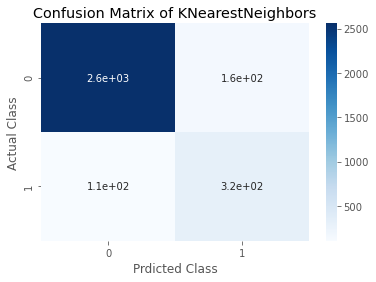

In [312]:
sns.heatmap(confusion_matrix(y_test,pred_rfc),annot = True,cmap='Blues')
plt.title('Confusion Matrix of KNearestNeighbors')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## LogisticRegression

In [313]:
LR_tunned_sm=LogisticRegression()

In [314]:
## Hyperparameter parameter Tunning

penalty= ['l1', 'l2']
C=[.001,.01,.1,1,10]
solver=['liblinear','lbfgs','saga']
hyperParam = [{'penalty':penalty,'C':C,'solver':solver,}]
rsearch_LR_sm=RandomizedSearchCV(LR_tunned_sm,param_distributions=hyperParam,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_LR_sm.fit(X_train_sm,y_train_sm)
print(rsearch_LR_sm.best_score_)
print("Best Hyperparameter Model",rsearch_LR_sm.best_estimator_)

0.8488629540334539
Best Hyperparameter Model LogisticRegression(C=0.01, penalty='l1', solver='liblinear')


In [315]:
## Choosing Best Hyperparameter after Tunning

LR_tunned_sm = rsearch_LR_sm.best_estimator_
LR_tunned_sm.fit(X_train_sm,y_train_sm)
pred_LR= LR_tunned_sm.predict(X_test)
print('Classification reporrt on Test Data :\n',classification_report(y_test,pred_LR))
print('Acccuracy Rate on Test data:\t',accuracy_score(y_test,pred_LR))

Classification reporrt on Test Data :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2714
           1       0.66      0.75      0.70       426

    accuracy                           0.91      3140
   macro avg       0.81      0.84      0.82      3140
weighted avg       0.92      0.91      0.91      3140

Acccuracy Rate on Test data:	 0.9124203821656051


In [316]:
## Print Confussion martix
confusion_matrix(y_test,pred_LR)

array([[2546,  168],
       [ 107,  319]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

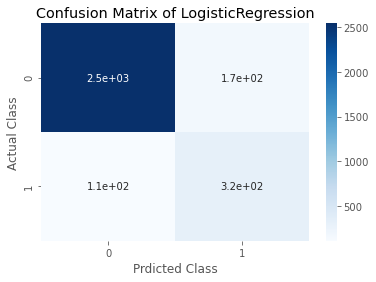

In [317]:
sns.heatmap(confusion_matrix(y_test,pred_LR),annot = True,cmap='Blues')
plt.title('Confusion Matrix of LogisticRegression')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## SVM

In [318]:
## Hyperparameter parameter Tunning

SVM_tunned_sm= SVC(random_state=0,probability=True)
params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']} 
rsearch_svm_sm=RandomizedSearchCV(SVM_tunned_sm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm_sm.fit(X_train_sm,y_train_sm)
print("Best HyperParameter: ",rsearch_svm_sm.best_params_)
print(rsearch_svm_sm.best_score_)

Best HyperParameter:  {'kernel': 'rbf', 'gamma': 1, 'C': 100}
0.9521474646123783


In [319]:
## Best paramesters
print('Model with Best Estimatores :',rsearch_svm_sm.best_estimator_)

Model with Best Estimatores : SVC(C=100, gamma=1, probability=True, random_state=0)


In [320]:
## Choosing Best Parameters

SVM_tunned_sm = rsearch_svm_sm.best_estimator_
SVM_tunned_sm.fit(X_train_sm,y_train_sm)
pred_sm = SVM_tunned_sm.predict(X_test)
print('Classification reporrt on Test Data :\n',classification_report(y_test,pred_sm))
print('Acccuracy Rate on Test data:\t',accuracy_score(y_test,pred_sm))

Classification reporrt on Test Data :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2714
           1       0.53      0.45      0.49       426

    accuracy                           0.87      3140
   macro avg       0.72      0.69      0.71      3140
weighted avg       0.86      0.87      0.87      3140

Acccuracy Rate on Test data:	 0.8719745222929937


In [321]:
## Print Confussion martix
confusion_matrix(y_test,pred_sm)

array([[2546,  168],
       [ 234,  192]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

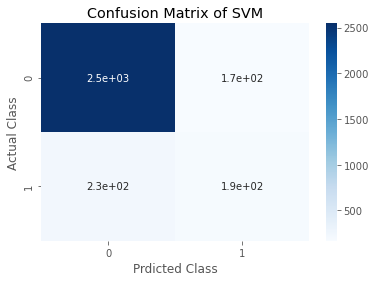

In [322]:
sns.heatmap(confusion_matrix(y_test,pred_sm),annot = True,cmap='Blues')
plt.title('Confusion Matrix of SVM')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

##  KNN

In [323]:
## Hyperparameter Tunning of KNN

sm_knn_tunned= KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,100)}

rsearch_knn_sm=RandomizedSearchCV(sm_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_sm.fit(X_train_sm,y_train_sm)
print("Best HyperParameter: ",rsearch_knn_sm.best_params_)
print(rsearch_knn_sm.best_score_)

Best HyperParameter:  {'n_neighbors': 10}
0.9541965998346088


In [324]:
print('Model with Best Estimatores :',rsearch_knn_sm.best_estimator_)

Model with Best Estimatores : KNeighborsClassifier(n_neighbors=10)


In [325]:
## Choosing Model with Best Parameters

sm_knn_tunned= rsearch_knn_sm.best_estimator_
sm_knn_tunned.fit(X_train_sm,y_train_sm)
pred_k = sm_knn_tunned.predict(X_test)
print('Classification reporrt on Test Data :\n',classification_report(y_test,pred_k))
print('Acccuracy Rate on Test data:\t',accuracy_score(y_test,pred_k))

Classification reporrt on Test Data :
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      2714
           1       0.43      0.75      0.54       426

    accuracy                           0.83      3140
   macro avg       0.69      0.80      0.72      3140
weighted avg       0.88      0.83      0.85      3140

Acccuracy Rate on Test data:	 0.8289808917197452


In [326]:
## Print Confussion martix
confusion_matrix(y_test,pred_sm)

array([[2546,  168],
       [ 234,  192]], dtype=int64)

Text(0.5, 15.0, 'Prdicted Class')

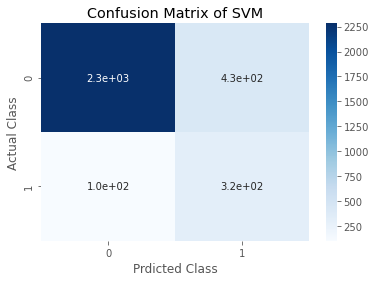

In [327]:
sns.heatmap(confusion_matrix(y_test,pred_k),annot = True,cmap='Blues')
plt.title('Confusion Matrix of SVM')
plt.ylabel('Actual Class')
plt.xlabel('Prdicted Class')

## SMOTE Model Results

In [328]:
models_sm = [('KNN',sm_knn_tunned),('SVM',SVM_tunned_sm),('LogisticRegresion',LR_tunned_sm),('RandomForest',rfc_tunned_sm)]

In [329]:
acc_train_sm=[]
auc_train_sm=[]

acc_test_sm=[]
auc_test_sm=[]
names_sm=[]
def model_eval(name,algo, Xtrain,ytrain,Xtest,ytest):
    names_sm.append(name)    
    
    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))

In [330]:
for name,algo in models_sm:
    model_eval(name,algo,X_train_sm,y_train_sm,X_test,y_test)

In [331]:
result_sm_df=pd.DataFrame({'Model':names_sm,
                           
                           'Accuracy Score Train':acc_train_sm,
                           'ROC-AUC Score Train':auc_train_sm,
                           
                           'Accuracy Score Test':acc_test_sm,
                           'ROC-AUC Score Test':auc_test_sm
                            })

In [332]:
result_sm_df

,Model,Accuracy Score Train,ROC-AUC Score Train,Accuracy Score Test,ROC-AUC Score Test
0,KNN,0.920483,0.985731,0.828981,0.870468
1,SVM,0.999052,0.999812,0.871975,0.838803
2,LogisticRegresion,0.849021,0.907791,0.912420,0.887671
3,RandomForest,0.994709,0.999888,0.916561,0.936186


### Conclusion :

- We ere getting almost same level of Accuracy even after using SMOTE Technique on Test Dataset, but we get little improvment in Recall Value of Revenue When it is True. Randomforedest Model seem better in term of predect the Test Data and have higher Recall value.So, we we will use Randomforest for Deployment.

- In 2021, an estimated 2.14 billion people worldwide are expected to purchase goods online  ( https://www.statista.com/statistics/251666/number-of-digital-buyers-worldwide/ ). If these online shopping statistics, projections show that ecommerce sales worldwide are going to grow to 6.4 trillion USD by 2024.Clearly, being able to predict e-commerce sales from online traffic would prove to be beneficial for any company.

### insight 

- Looking at our results, companies should focus on improving mobility between pages to encourage users to browse among different products as Page Value was one of the most important features in determining whether a purchase would be made.
- certain months such as May and November had a greater frequency in purchases meaning that e-commerce companies should capitalize in these months and provide additional sales and deals to encourage product sales. 

- customers who are interested on buying the products :
- Tend to stay longer on the website especially when they are on the website which is productrelated.
- Less likely to bounce or exit
- Have strong Correlation with the PageValues
- Therefore, in order to increase the customers who generates the profits, the business should find a way to decrease the BounceRates and ExitRates and improve on the quality of the page.